In [1]:
## example of spectra gluing

import os
import numpy as np
import matplotlib.pyplot as plt
import speutils

## parameters
folder='datafolder/testdata'
SPE_list=['il02_120.SPE','il02_121.SPE','il02_122.SPE','il02_123.SPE','il02_124.SPE','il02_125.SPE',
          'il02_126.SPE','il02_127.SPE','il02_128.SPE','il02_129.SPE']
fname_out='glued.csv'
start=800
end=1700
resolution=0.5

# import importlib
# importlib.reload(speutils)

<module 'speutils' from '/usr/local/lib/python3.13/site-packages/speutils/__init__.py'>

In [7]:
fname_list=[]
for spe in SPE_list:
    fname_list.append(folder+'/'+spe)

wl_list = []
spectra_list = []
norm_exp_sec=True
for i, fname in enumerate(fname_list):
    wl, spectrum = speutils.readspe_simple(fname, norm_exp_sec)
    wl_list.extend([wl])
    spectra_list.extend([spectrum])

In [8]:
## glueing spectra
edge_processing_mode=2 # do not change !
verbose=False # or True

wl_dest,spectrum0,flg0 = speutils.gluemultiplespe(fname_list, start, end, resolution, 
                                                  norm_exp_sec, edge_processing_mode, verbose)

## for CSV files, use gluemultiplecsv with flag_header option
# flag_header=0 # set 1 if no headers in the CSV files
# wl_dest,spectrum0,flg0 = speutils.gluemultiplecsv(fname_list, start, end, resolution, 
#                                                  norm_exp_sec, edge_processing_mode, verbose,flag_header)


datafolder/testdata/il02_120.SPE datafolder/testdata/il02_121.SPE


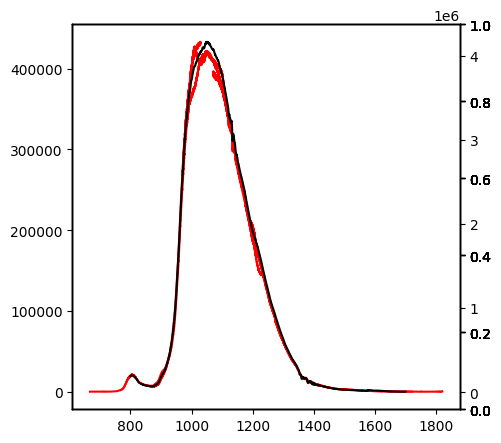

In [9]:
## plot
fig = plt.figure(figsize=(5, 5))
fig.tight_layout()
ax1 = fig.add_subplot(111)
# if (logscale):
#            ax1.set_yscale('log')
for i in np.arange(len(wl_list)):
    ax1.plot(wl_list[i], spectra_list[i], color='red')
    ax2 = ax1.twinx()

# if (logscale):
#            ax2.set_yscale('log')
ax2.plot(wl_dest, spectrum0, color='black')

In [5]:
# save glued spectrum to a csv file

speutils.savecsv(fname_out,wl_dest, spectrum0)